In [1]:
import kagglehub
kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


In [2]:
data_path = kagglehub.competition_download('playground-series-s5e8')

print('Data source import complete.')

100%|██████████| 14.7M/14.7M [00:00<00:00, 110MB/s] 

Extracting files...


Data source import complete.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
import warnings
warnings.filterwarnings("ignore")

Import train and test dataset

In [5]:
data = pd.read_csv(os.path.join(data_path, 'train.csv'))
test_data = pd.read_csv(os.path.join(data_path, 'test.csv'))

# EDA

In [6]:
data.shape

(750000, 18)

In [7]:
data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [8]:
data.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [10]:
missing_table = pd.DataFrame({
    'Missing Values': data.isna().sum(),
    'Percentage (%)': (data.isnull().mean() * 100).round(2)
})

print(missing_table.sort_values(by='Missing Values', ascending=False))

           Missing Values  Percentage (%)
id                      0             0.0
age                     0             0.0
job                     0             0.0
marital                 0             0.0
education               0             0.0
default                 0             0.0
balance                 0             0.0
housing                 0             0.0
loan                    0             0.0
contact                 0             0.0
day                     0             0.0
month                   0             0.0
duration                0             0.0
campaign                0             0.0
pdays                   0             0.0
previous                0             0.0
poutcome                0             0.0
y                       0             0.0


In [11]:
data.nunique()

,0
id,750000
age,78
job,12
marital,3
education,4
default,2
balance,8217
housing,2
loan,2
contact,3


# Data visualisation

Check dataset balance

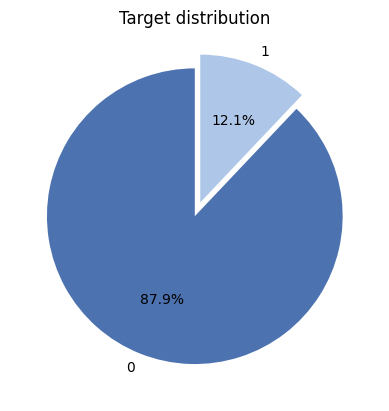

In [12]:
data['y'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=(0,0.1), colors=['#4c72b0', '#aec7e8'])
plt.title('Target distribution')
plt.ylabel('')
plt.show()

<Axes: xlabel='age', ylabel='Count'>

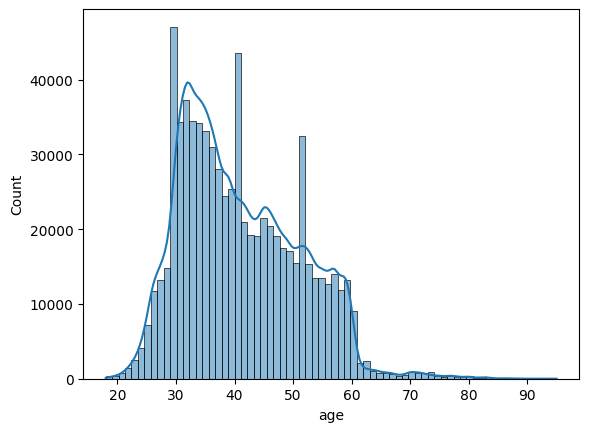

In [13]:
sns.histplot(data=data, x="age", kde=True, bins=70)

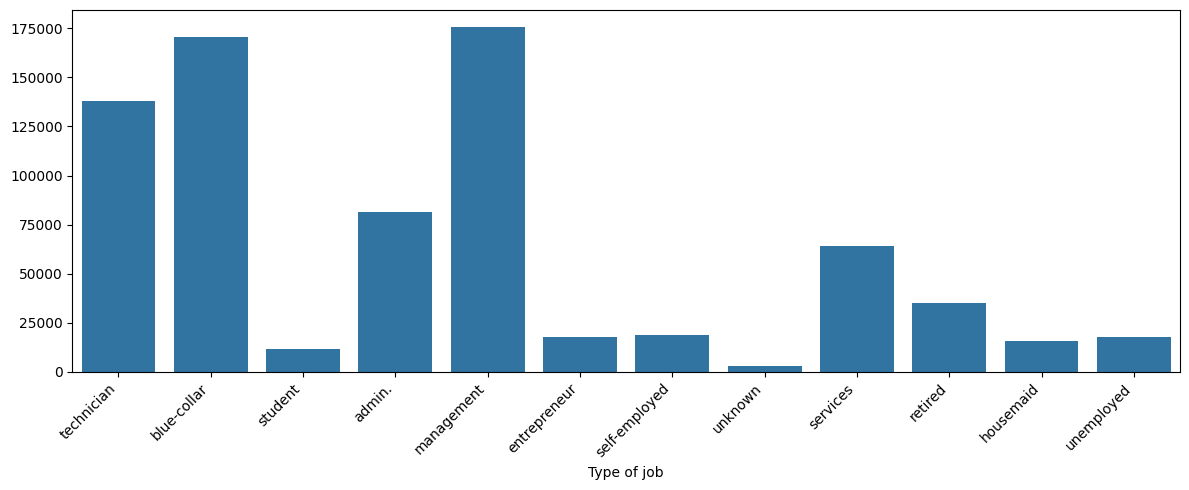

In [14]:
plt.figure(figsize=(12, 5))
sns.countplot(data=data, x="job")
plt.xlabel('Type of job')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

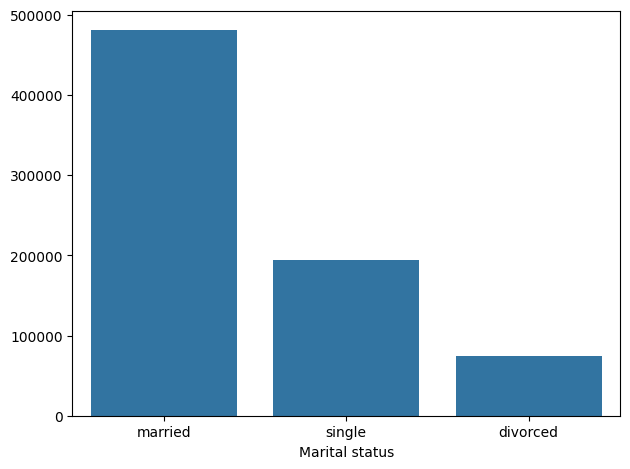

In [15]:
sns.countplot(data=data, x="marital")
plt.xlabel('Marital status')
plt.ylabel('')
plt.tight_layout()
plt.show()

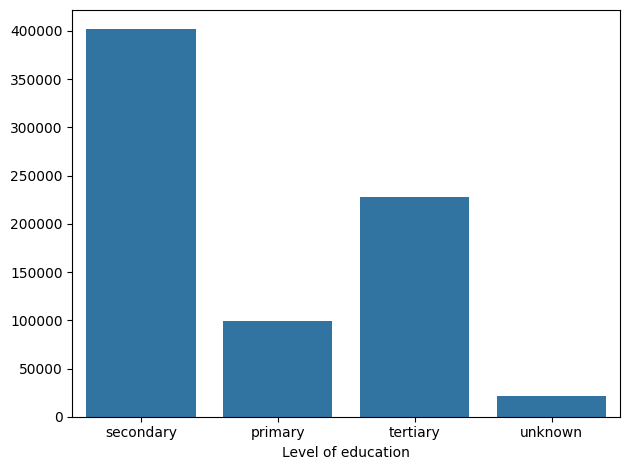

In [16]:
sns.countplot(data=data, x="education")
plt.xlabel('Level of education')
plt.ylabel('')
plt.tight_layout()
plt.show()

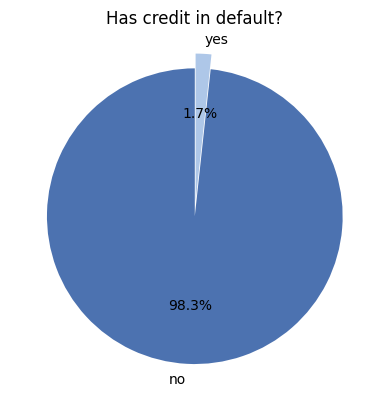

In [17]:
data['default'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=(0,0.1), colors=['#4c72b0', '#aec7e8'])
plt.title('Has credit in default?')
plt.ylabel('')
plt.show()

<Axes: xlabel='balance', ylabel='Count'>

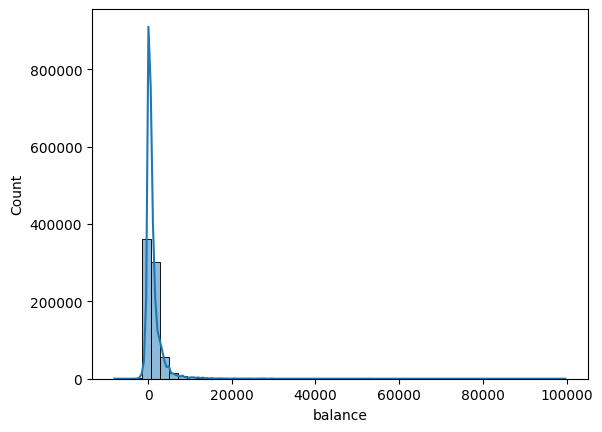

In [18]:
sns.histplot(data=data, x="balance", kde=True, bins=50)

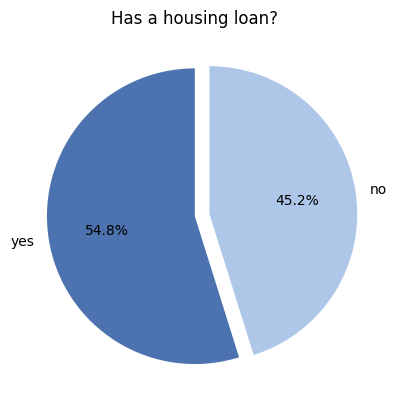

In [19]:
data['housing'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=(0,0.1), colors=['#4c72b0', '#aec7e8'])
plt.title('Has a housing loan?')
plt.ylabel('')
plt.show()

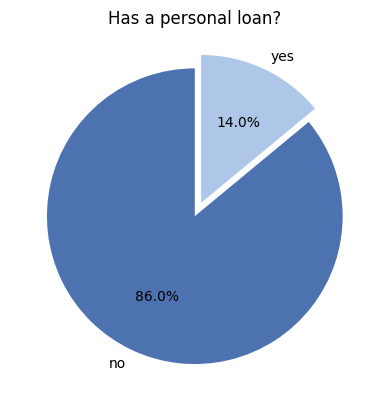

In [20]:
data['loan'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=(0,0.1), colors=['#4c72b0', '#aec7e8'])
plt.title('Has a personal loan?')
plt.ylabel('')
plt.show()

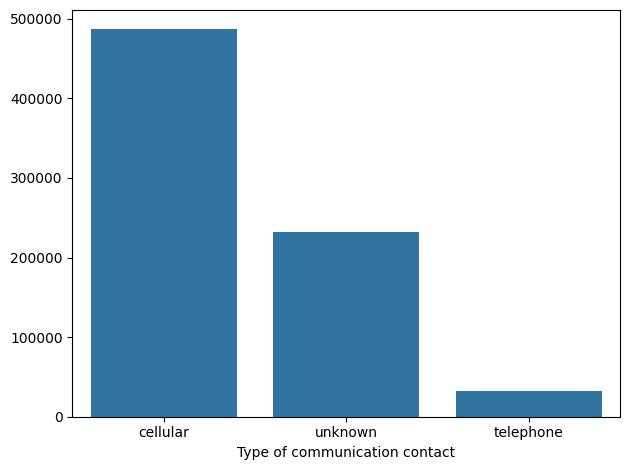

In [21]:
sns.countplot(data=data, x="contact")
plt.xlabel('Type of communication contact')
plt.ylabel('')
plt.tight_layout()
plt.show()

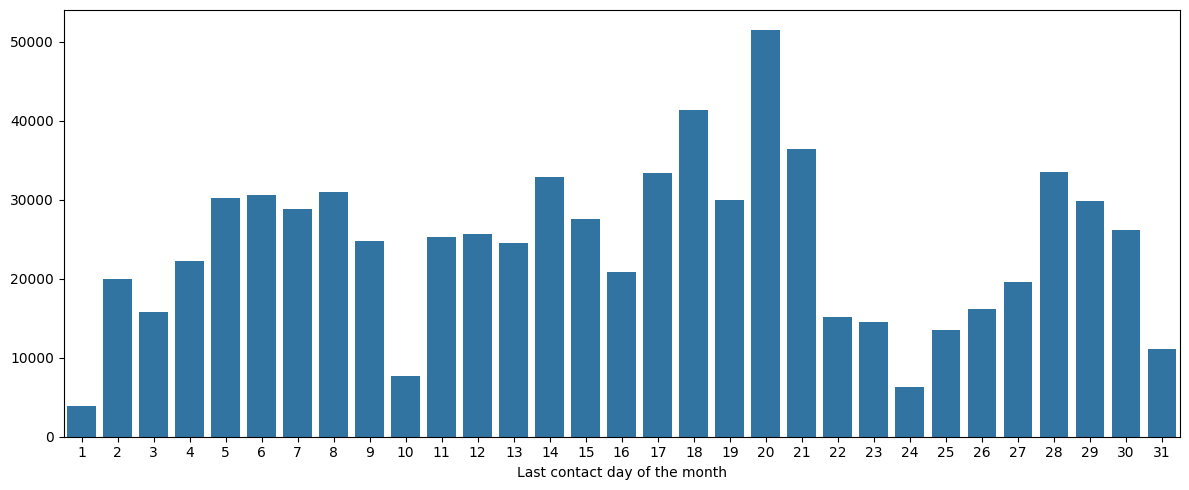

In [22]:
plt.figure(figsize=(12, 5))
sns.countplot(data=data, x="day")
plt.xlabel('Last contact day of the month')
plt.ylabel('')
plt.tight_layout()
plt.show()

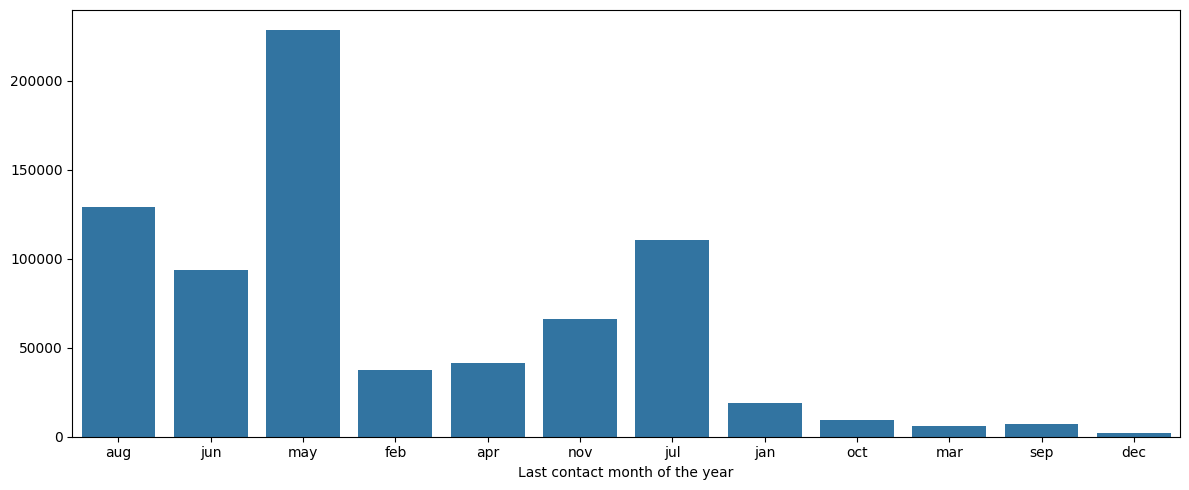

In [23]:
plt.figure(figsize=(12, 5))
sns.countplot(data=data, x="month")
plt.xlabel('Last contact month of the year')
plt.ylabel('')
plt.tight_layout()
plt.show()

<Axes: xlabel='duration', ylabel='Count'>

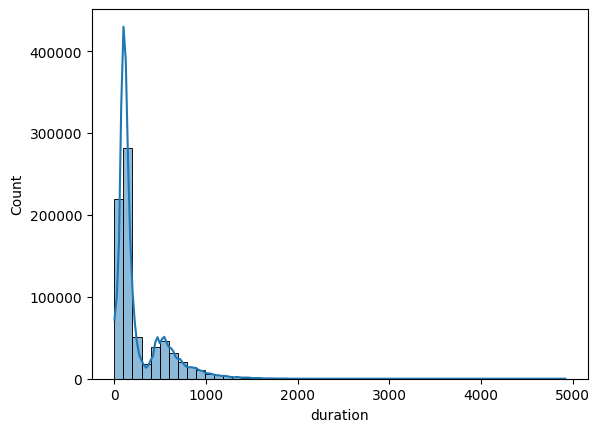

In [24]:
sns.histplot(data=data, x="duration", kde=True, bins=50)

<Axes: xlabel='campaign', ylabel='Count'>

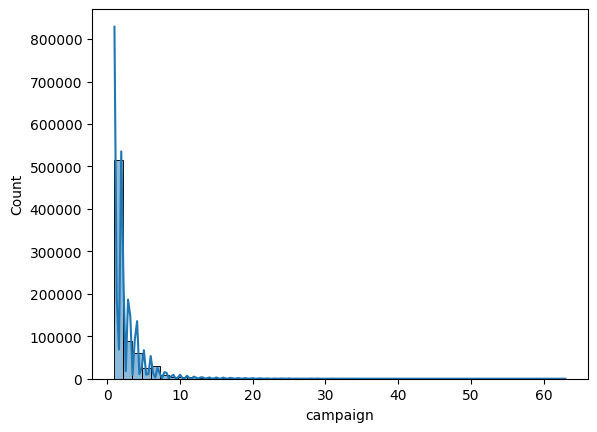

In [25]:
sns.histplot(data=data, x="campaign", kde=True, bins=50)

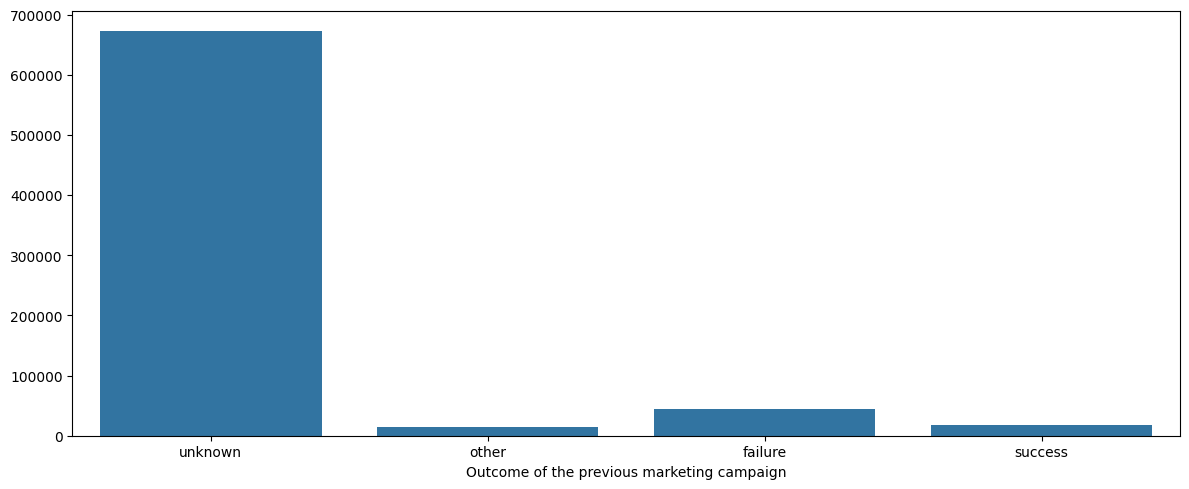

In [26]:
plt.figure(figsize=(12, 5))
sns.countplot(data=data, x="poutcome")
plt.xlabel('Outcome of the previous marketing campaign')
plt.ylabel('')
plt.tight_layout()
plt.show()

Correlation matrix

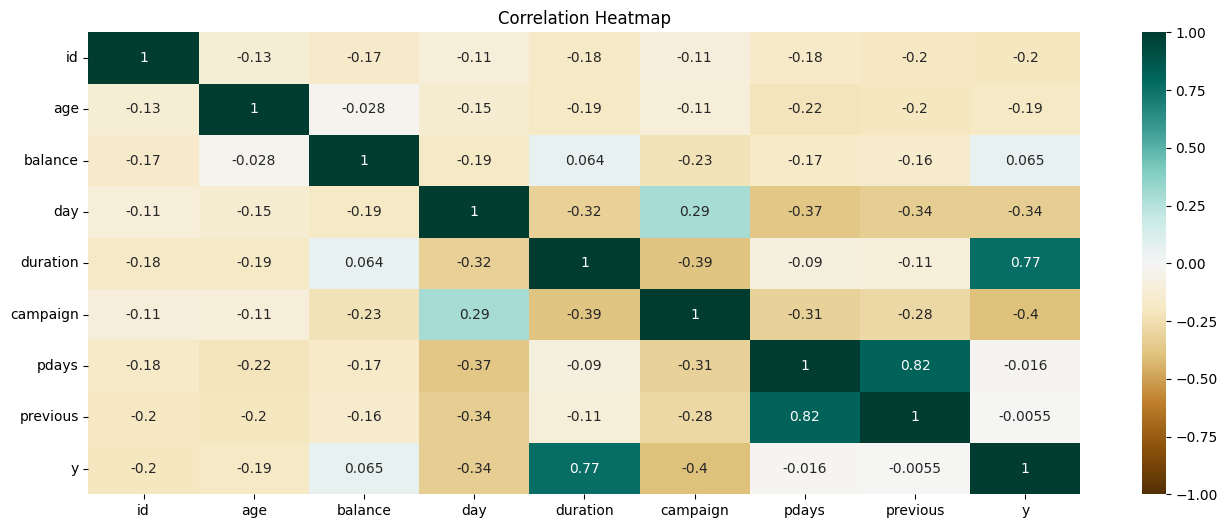

In [27]:
plt.figure(figsize=(16, 6))

data_corr = data.corr(numeric_only=True)

heatmap = sns.heatmap(data_corr.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12})

plt.show()

# Data preprocessing

In [30]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import shuffle

In [31]:
X = data.drop(['y', 'id'], axis=1)
y = data['y']

In [32]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

In [33]:
categorical_pipeline = Pipeline([
    ('encoder', OrdinalEncoder())
])

In [34]:
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, make_column_selector(dtype_include=['int64', 'float64'])),
    ('cat', categorical_pipeline, make_column_selector(dtype_include=['object']))
])

In [35]:
le = LabelEncoder()
y = le.fit_transform(y)

In [36]:
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self):
      pass

    def fit(self, X, y = None):
      return self

    def transform(self, X):
        X = X.copy()

        X['long_call'] = X['duration'] > 200
        X['balance_positive'] = (X['balance'] > 0).astype(int)
        X['campaign_multiple'] = (X['campaign'] > 2).astype(int)
        X['age_bin'] = pd.cut(X['age'], bins=[17, 30, 60, 100], labels=['young', 'middle', 'senior'])

        X['duration_log'] = np.log1p(X['duration'])
        X['campaign_log'] = np.log1p(X['campaign'])
        X['pdays_log'] = np.log1p(X['pdays'] + 1)
        X['previous_log'] = np.log1p(X['previous'])
        X['balance_sqrt'] = np.sqrt(X['balance'] - X['balance'].min() + 1)
        X['age_squared'] = X['age'] ** 2

        return X

# Model building

In [37]:
import xgboost as xgb
from collections import Counter
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
import lightgbm as lgb

In [38]:
counter = Counter(y)
scale_pos_weight = counter[0] / counter[1]

In [39]:
best_params =  {'max_depth': 11,
                  'learning_rate': 0.08247101477015132,
                  'n_estimators': 1000,
                  'subsample': 0.9808690492838653,
                  'colsample_bytree': 0.5831655543160346,
                  'min_child_weight': 1,
                  'gamma': 0.1832798205532591,
                  'lambda': 4.510522889747622,
                  'alpha': 5.007953193043952,
                  'n_jobs': -1,
                  "objective" : "binary:logistic",
                  "eval_metric" : "auc"
                  }

In [40]:
params = {
    'objective': "binary",
    'metric': 'auc',
    'verbosity': -1,
    'boosting_type': "gbdt",
    'learning_rate': 0.01,
    'max_depth': 20,
    'num_leaves': 200,
    'max_bin': 400,
    'subsample': 0.85,
    'colsample_bytree': 0.7,
    'subsample_freq': 1,
    'reg_alpha': 6.0,
    'reg_lambda': 4.0,
    'min_child_samples': 25,
    'min_split_gain': 0.001,
    'n_jobs': -1,
    'lambda_l1': 0.5,
    'lambda_l2': 0.3
}


In [41]:
pipeline = Pipeline([
    ('features', FeatureEngineer()),
    ('preprocessing', preprocessor)
    ])

In [42]:
X_preprocessed = pipeline.fit_transform(X)
X_test_preprocessed = pipeline.transform(test_data)

In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
oof_preds = np.zeros(len(X_preprocessed))
test_preds = np.zeros(len(X_test_preprocessed))

for fold, (train_idx, val_idx) in enumerate(skf.split(X_preprocessed, y)):
    print(f"Fold {fold + 1}")

    X_train, X_val = X_preprocessed[train_idx], X_preprocessed[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    dtrain = lgb.Dataset(X_train, label=y_train)
    dval = lgb.Dataset(X_val, label=y_val, reference=dtrain)

    lgb_model = lgb.train(
        params,
        train_set=dtrain,
        num_boost_round=1000,
        valid_sets=[dval]
        )

    oof_preds[val_idx] = lgb_model.predict(X_val)
    test_preds += lgb_model.predict(X_test_preprocessed) / skf.n_splits

# Calculate AUC
cv_roc = roc_auc_score(y, oof_preds)
print(f"Cross-Validation ROC AUC: {cv_roc:.4f}")


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9


# Submition

In [ ]:
submission = pd.DataFrame({
    'id': test_data["id"],
    'y': test_preds
})

In [ ]:
submission

,id,y
0,750000,0.004152
1,750001,0.079248
2,750002,0.000365
3,750003,0.000114
4,750004,0.020264
...,...,...
249995,999995,0.000126
249996,999996,0.089041
249997,999997,0.755269
249998,999998,0.001089


In [ ]:
submission.to_csv('submission.csv', index=False)